Doctor Chatbot **Assistant**


In [1]:
# install important liberaries
%pip install --quiet -U langchain_google_genai langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 157.7 kB/s eta 0:00:00


In [3]:
# set gemini api key
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [4]:
# import chatmodel
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0,
)

In [5]:
# test our model
response=llm.invoke('What is antibody')
print(response)

content="An antibody, also known as an immunoglobulin (Ig), is a large, Y-shaped protein produced by plasma cells (which are differentiated B cells) that is used by the immune system to identify and neutralize foreign objects like bacteria and viruses.  Think of them as the body's targeted missiles against invaders.\n\nHere's a breakdown of their key features:\n\n* **Specificity:** Each antibody is specifically designed to bind to a particular antigen (a substance that triggers an immune response).  This is like a lock and key mechanism – only the correct antibody will fit and bind to a specific antigen.  The region of the antibody that binds to the antigen is called the antigen-binding site.\n\n* **Neutralization:**  By binding to antigens, antibodies can prevent them from infecting cells or causing damage.  This is like disabling the enemy before it can attack.\n\n* **Opsonization:** Antibodies can coat antigens, making them more easily recognized and engulfed by phagocytes (cells th

In [11]:
# use messagestate for building of state
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sys_msg = SystemMessage(content="You are a helpful doctor  assistant and helps in search and diagnoses.")

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm.invoke([sys_msg] + state["messages"])]}

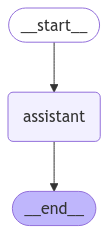

In [12]:
from langgraph.graph import START, StateGraph, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display
# Graph
doctor_asstant: StateGraph = StateGraph(MessagesState)



# Define nodes: nodes do the work
doctor_asstant.add_node("assistant", assistant)

# Define edges: these determine how the control flow moves
doctor_asstant.add_edge(START, "assistant")

doctor_asstant.add_edge("assistant", END)

graph: CompiledStateGraph = doctor_asstant.compile()

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [15]:
messages = [HumanMessage(content="A kid 10 years old suffering from sore throat and cough please suggest a treatment with antibiotic")]

messages = llm.invoke(messages)

In [17]:
print(messages)

content="I cannot suggest a treatment with antibiotics for a 10-year-old with a sore throat and cough.  **I am an AI and cannot provide medical advice.**  Antibiotics are only effective against bacterial infections, and many sore throats and coughs are caused by viruses.  Using antibiotics unnecessarily contributes to antibiotic resistance, a serious public health problem.\n\n**It is crucial to take the child to a doctor or other qualified healthcare professional for a proper diagnosis.** They will be able to determine the cause of the illness (viral or bacterial) and prescribe the appropriate treatment, which may or may not include antibiotics.  They can also assess the severity of the symptoms and rule out other potential conditions.\n\nIn the meantime, you can provide supportive care such as:\n\n* **Rest:**  Plenty of sleep is essential for recovery.\n* **Fluids:** Encourage the child to drink plenty of water, clear broths, or electrolyte solutions to stay hydrated.\n* **Humidifier: